<a href="https://colab.research.google.com/github/PWRScript/afterschool-machine-learning/blob/main/exercicios/Aula%203%20-%20Exercicio%20Aberto%20-%20Previs%C3%A3o%20da%20qualidade%20dos%20vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício em aberto

## Enunciado

Neste exercício, pretendemos prever a qualidade dos vinhos. Para tal, vamos ter em consideração diversas características químicas dos vinhos, tais como o seu teor alcoólico, pH e densidade.

## Dados

* Número de observações = 1599
* Número de variáveis independentes = 11
 1. fixed acidity = acidez fixa (g/dm^3)
 1. volatile acidity = acidez volátil (g/dm^3)
 1. citric acid = acidez cítrica (g/dm^3)
 1. residual sugar = teor de açúcar residual (g/dm^3)
 1. chlorides = teor de cloretos (g/dm^3)
 1. free sulfur dioxide = teor de dióxido de enxofre livre (mg/dm^3)
 1. total sulfur dioxide = teor de dióxido de enxofre total (mg/dm^3)
 1. density = densidade (g/cm^3)
 1. pH = pH
 1. sulphates = teor de sulfatos (g/dm^3)
 1. alcohol = teor alcoólico (%)
* Número de variáveis dependentes = 1
 1. quality = qualidade do vinho (0 para vinhos de qualidade mínima, 10 para vinhos de qualidade máxima)

Dados disponíveis em: https://raw.githubusercontent.com/pmarcelino/datasets/master/red-wine-modified-md.csv.

## Instruções

Na tua resolução deves:

* Usar um diagrama de extremos e quartis para detetar se há erros e anomalias na variável 'pH'
* Estabelecer, pelo menos, uma hipótese inicial que relacione a qualidade do vinho com uma ou mais variáveis independentes
* Criar um ou mais gráficos de dispersão que testem a(s) hipótese(s) formulada(s)

# Resolução

## Importar bibliotecas

In [25]:
# Preparação de Dados
import pandas as pd
# Exploração de Dados
import seaborn as sb

# Treinar e avaliar modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Preparação de *Dados* 


### Obter dados

In [26]:
# Onde está localizado o dataset
dataset_url = "https://raw.githubusercontent.com/pmarcelino/datasets/master/red-wine-modified-md.csv"

# Carregar dataset numa Dataframe do Pandas para exploração e tratamento de modelos
data = pd.read_csv(dataset_url)

# Visualizar dados (sem tratamento)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,NaN,0.00,2.6,0.098,NaN,67.0,0.99680,3.20,NaN,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Verificar se faltam dados e completar o dataset se necessário

In [27]:
# Colunas com dados em falta
data.isnull().sum()

fixed acidity            0
volatile acidity         8
citric acid              7
residual sugar          14
chlorides               13
free sulfur dioxide     14
total sulfur dioxide    12
density                 12
pH                      11
sulphates               11
alcohol                 10
quality                 10
dtype: int64

In [28]:
# Remover colunas com dados não necessários para previsão do modelo
data = data.drop("fixed acidity",axis=1)
data = data.drop("volatile acidity",axis=1)
data = data.drop("citric acid",axis=1)
data = data.drop("residual sugar",axis=1)
data = data.drop("chlorides",axis=1)
data = data.drop("free sulfur dioxide",axis=1)
data = data.drop("total sulfur dioxide",axis=1)
data = data.drop("sulphates",axis=1)

In [29]:
# Remover linhas que não possuam valores (pois são variaveis essenciais iriam induzir a maior taxa de erros nas previsões)
data = data.dropna()

In [30]:
# Verificar se ainda existem colunas com dados em falta
data.isnull().sum()

density    0
pH         0
alcohol    0
quality    0
dtype: int64

## Exploração de Dados

### Verificar anormalias e erros, corrigindo se necessário


In [31]:
# Através dos valores observados usando as estatisticas de tabela do pandas
data.describe()

,density,pH,alcohol,quality
count,1586.000000,1586.000000,1586.000000,1586.000000
mean,0.996747,3.310706,10.424685,5.637453
std,0.001889,0.153839,1.065668,0.808681
min,0.990070,2.740000,8.400000,3.000000
25%,0.995600,3.210000,9.500000,5.000000
50%,0.996750,3.310000,10.200000,6.000000
75%,0.997837,3.400000,11.100000,6.000000
max,1.003690,4.010000,14.900000,8.000000


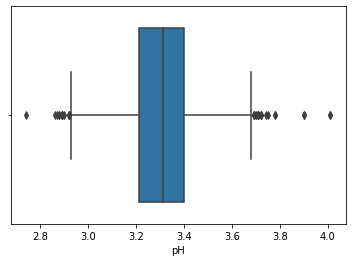

In [32]:
# Diagrama de extremos e quartis para detetar se há erros e anomalias na variável 'pH'
sb.boxplot(x="pH", data=data)

Consultando a internet sobre o pH comum dos vinhos: 

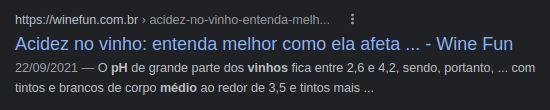

Podemos concluir que o menor pH existente no dataset é de 2.740000 e o maior pH existente no dataset é de 4.010000, o que segundo a informação encontrada na internet (que estabelece que 2.6 a 4.2 é o pH normal dos vinhos) podemos verificar que não existem erros nem anormalias no pH dos vinhos

### Análises via gráficos e estabelecimento de teorias sobre a relação entre as variáveis e a qualidade dos vinhos

Segundo a minha análise inicial tenho como visão inicial sem qualquer visualização de gráficos a seguinte ideia:

*   **pH** mais baixo implica um vinho mais ácido o que afeta a qualidade do  vinho negativamente
*   **Álcool** mais elevado torna o consumo do vinho mais aliciante, o que aumenta a sua classificação
*   **Densidade** mais baixa significa maior qualidade do vinho pois este não é tão "forte" no organismo

**Agora vou realizar uma análise destas 3 variáveis para verificar se os dados da minha análise incial se confirma:**

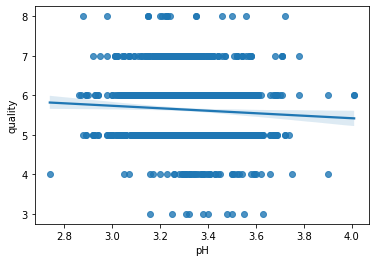

In [33]:
# Relacionando a qualidade do vinho com o seu pH 
sb.regplot(
    data=data, 
    x='pH', 
    y='quality',
    scatter=True
)

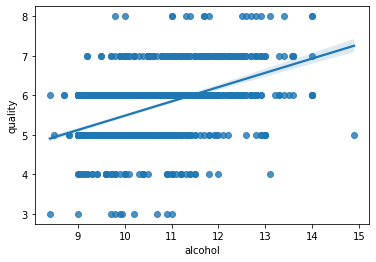

In [34]:
# Relacionando a qualidade do vinho com o seu teor alcólico
sb.regplot(
    data=data, 
    x='alcohol', 
    y='quality',
    scatter=True
)

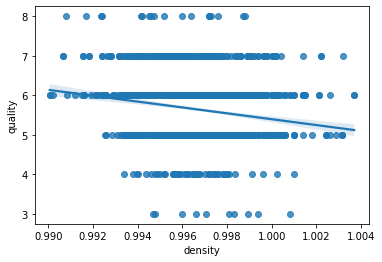

In [35]:
# Relacionando a qualidade do vinho com a sua densidade
sb.regplot(
    data=data, 
    x='density', 
    y='quality',
    scatter=True
)

**Relacionando os 3 elementos, podemos tirar as seguintes conclusões:**


1.   Com o aumento do **pH** podemos observar uma ligeira queda na **qualidade** do vinho (na ordem de 4 a 6%)
2.   Com o aumento do **álcool** podemos observar um aumento bismal na **qualidade** do vinho (na ordem dos 20 a 22%)
3.   Com o aumento da **densidade** podemos observar uma descida bismal na **qualidade** do vinho (na ordem dos 8 a 10%)

Posso verificar que as minhas análises iniciais estavam corretas, o que permite agora maior facilidade no treino do modelo



## Treinar modelo

### Variáveis dependentes e independentes

In [36]:
# Variáveis independentes
x = data.drop("quality", axis=1)
# Variável Dependente
y = data["quality"]

### Dividir conjunto de dados de treino do conjunto de dados de teste

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

### Definir algoritmo do modelo

In [38]:
model = RandomForestClassifier(random_state=9)

### Treinar modelo

In [39]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=9)

### Fazer previsão

In [40]:
y_pred = model.predict(x_test)

### Taxa de acerto do modelo

In [41]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6523929471032746